# OZ-like correlation decomposition

Consider a correlation (or covariance) matrix $ H = ( h_{ij} ) $. We model the correlation coefficient $ h_{ij} $ as a sum of direct correlation $ c_{ij} $ and indirect correlations. Here, indirect correlation between $ i $ and $ j $ is the product of correlation coefficients along all possible walks from $ i $ to $ j $, each step being weighted by a hyperparameter $ \rho $. So,
$$
    h_{ij}
    =
    c_{ij}
    +
    \rho \sum_{k} c_{ik} c_{ki}
    +
    \rho^2 \sum_{k,l} c_{ik} c_{kl} c_{lj}
    +
    \cdots
    .
$$
Or, in the matrix form,
$$
    H = \sum_{n=0}^{\infty} \rho^n C^{n+1} .
$$
We allow cycles in indirect correlation trajectories but disallow self-loops; so, the diagonal elements of $ H $ and $ C $ are all set to zero. Now, observe
$$
\begin{align}
    H & = C + \sum_{n=1}^{\infty} \rho^n C^{n+1}
    \\
      & = C + \rho C \sum_{n=0}^{\infty} \rho^n C^{n+1}
    \\
      & = C + \rho C H .
\end{align}
$$
The zero-diagonal constraint makes it impossible to solve this linear equation for $ C $ algebraically. So, we use an iterative procedure using the equation as the update rule:
$$
    C \leftarrow H - \rho C H .
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load example correlation matrix
correlation_matrix = np.loadtxt("H.dat")

In [3]:
rho = 1.2
momentum = 0.9
iterations = 10000

def zero_diagonal(X):
    return X - np.diag(np.diagonal(X))

n, _ = correlation_matrix.shape
H = zero_diagonal(correlation_matrix)
C = H

for _ in range(iterations):
    new_C = H - rho * C @ H
    new_C = zero_diagonal(new_C)

    # Use momentum update for numerical stability
    C = momentum * C + (1 - momentum) * new_C

    # Correct assymmetry due to numerical error
    C = (C + C.T) / 2

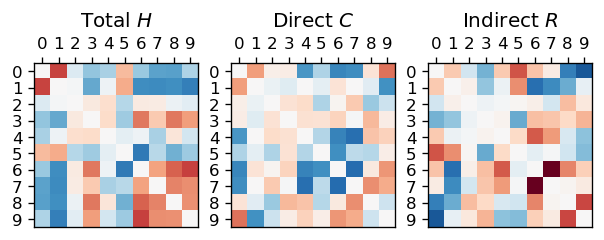

In [4]:
R = H - C

fig, axes = plt.subplots(1, 3, figsize=(6.0, 2.2), dpi=120)

axes[0].matshow(H, vmin=-1, vmax=1, cmap="RdBu_r")
axes[1].matshow(C, vmin=-1, vmax=1, cmap="RdBu_r")
axes[2].matshow(R, vmin=-1, vmax=1, cmap="RdBu_r")

axes[0].set_title("Total $ H $")
axes[1].set_title("Direct $ C $")
axes[2].set_title("Indirect $ R $")

def style(ax):
    ticks = np.arange(n)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.tick_params(bottom=False)

style(axes[0])
style(axes[1])
style(axes[2])